# communicate-data-findings(fordgobike-tripdata)
by Abdelhamed Saber

At the end of 2018, Ford GoBike will cross 7,000 motorcycles at 546 stops and will be the second-largest cycling sharing network in the world. The scheme in San Francisco has already expanded to 1,750 bikes by the end of the year. New cycle sharing. The East Bay and San Jose expansions are set to commence on the week of 10 July. In the press event held yesterday, the initial 700-cycle fleet, introduced as a pilot project in 2013 as the Bay Area Bike Share, was "very modest but successful," "Today marks the day we build on that success and blow it out of the water, increasing bike-share in the region by tenfold." (I've reached that information through this blog:https://www.sfmta.com/videos/regional-leaders-announce-ford-gobike-expansion)

In [211]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.available
import seaborn as sb
import seaborn as sns
from requests import get
from datetime import datetime
import json
import datetime
import math
import calendar
import warnings
import os
import glob
from datetime import timedelta, datetime
from matplotlib.pyplot import figure
from zipfile import ZipFile
from sklearn import datasets
from IPython.display import Image
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
import matplotlib.ticker as tick
import matplotlib.dates as mdates
from matplotlib.artist import Artist
from pandas.plotting import scatter_matrix
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [212]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [148]:
df.shape

(183412, 16)

In [149]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [150]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [151]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [152]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [153]:
df.tail

<bound method NDFrame.tail of         duration_sec                start_time                  end_time  \
0              52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2              61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3              36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4               1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
...              ...                       ...                       ...   
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                                s

There are 183,412 Fordgobike dataset data trips with 16 functionalities (Sec, Start, Time, Time, Start, Station Names, Latitude-start, Longitude start, LLP, Station start, Name end, L2 end station name, Bicycle id, Member born year, Bike share for all). The plurality of variables are 9 number, and others are two datetimes, four type of object and one type of boolean. I hope that one of the start and end stations will have the greatest impact, so there should be more rides for the busy areas, I also assume user type, age and gender can influence the length of your journey.

### What is the structure of your dataset?

> The initial composite data comprises about 1860,000 single trip reports of 16 compiled variables. Divide the factors into three primary categories:

trip duration: duration_sec, start_time, end_time
station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude
member info (anonymized): bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip Derived features/variables to assist exploration and analysis:
trip info: duration_minute, start_date, start_hourofday, start_dayofweek, start_month
member: member_age

### What is/are the main feature(s) of interest in your dataset?

> In order to gains a sense of the way users use the bike sharing service, I am more interested in researching the length and the rental events of the cycling trips, as well as their characteristics, namely, user type, sex, age, etc. Questions for example: when are the most travel time, day of the week or month of the year?? How long is the normal journey? Is this based on whether a person is a subscriber or a client?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Any journey's beginning date/time and length details can help to explain the time and time of a ride. The input from participants such as user type, gender and age allows us to figure out who are the major consumer focus groups, use the various groups to summarise bike usage details to see whether a particular category of riders is correlated with any specific trend.

## Univariate Exploration

In [154]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

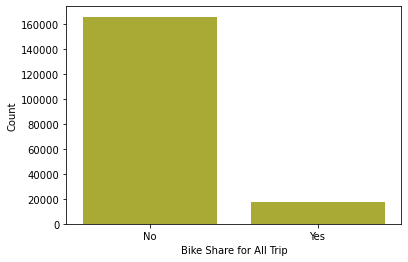

In [155]:
base_color = sb.color_palette()[8]
sb.countplot(data=df, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

Generate new fields for date 

Devising a simple starting station id distribution

# Percentage of all bike rides per gender

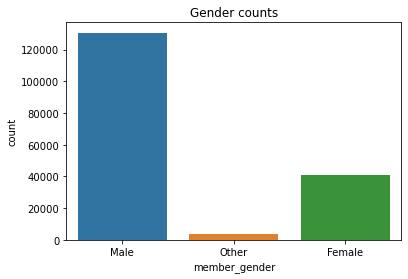

In [156]:
sb.countplot(data = df, x = 'member_gender')
plt.title('Gender counts');

There are much more than 12000000 male riders, while just 400000 are female riders.

In [157]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

From the privous result, Male=130651 , Female=40844 , Other=3652.
I think these numbers are more accurate. 

In [158]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

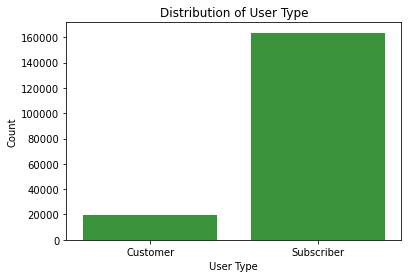

In [159]:
base_color = sb.color_palette()[2]
sb.countplot(data=df, x='user_type', color=base_color);
plt.title('Distribution of User Type')
plt.xlabel('User Type');
plt.ylabel('Count');

This graph is closer to the numbers shown in the previous result. 

In [160]:
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) \n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

Total =  183412
user_type =  0 %


Subscriber    89.17
Customer      10.83
Name: user_type, dtype: float64

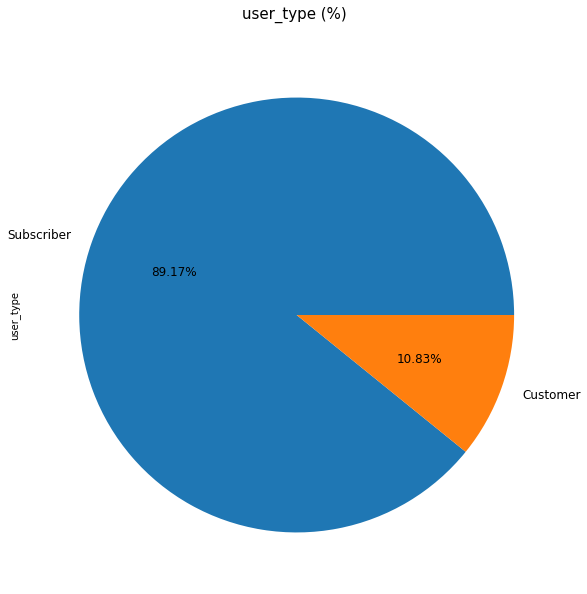

In [161]:
total = len(df.index)
print('Total = ', total)
total_noshow = (df['user_type'] == 'Yes').sum()
print('user_type = ', int((total_noshow / total) * 100), '%')
PropByVar(df, 'user_type')

This graph shows the percentage of the user type according to the number recorded

# Now we can go deeper and get to know the percentage of participation according to gender.

Total =  183412
member_gender =  0 %


Male      71.23
Female    22.27
Other      1.99
Name: member_gender, dtype: float64

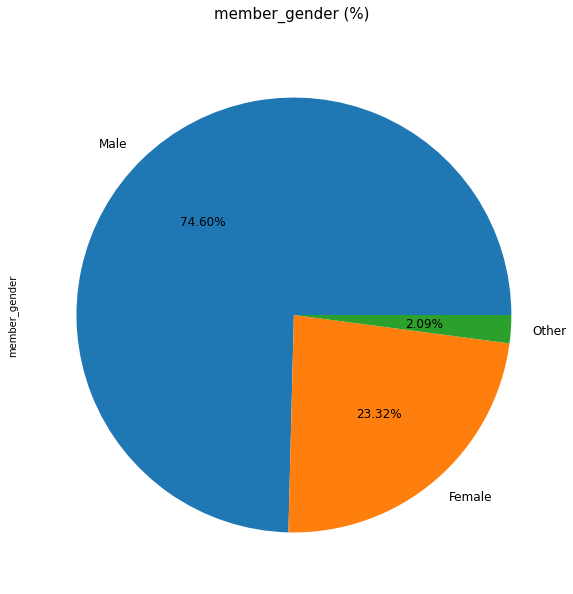

In [162]:
total = len(df.index)
print('Total = ', total)
total_noshow = (df['member_gender'] == 'Yes').sum()
print('member_gender = ', int((total_noshow / total) * 100), '%')
PropByVar(df, 'member_gender')

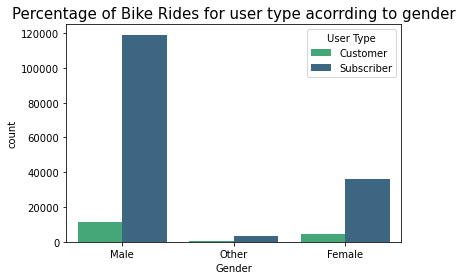

In [163]:
sns.countplot(data=df, x='member_gender', hue='user_type', color=base_color, palette='viridis_r')
ax = plt.gca()
ax.legend().set_title('User Type')
ax.set_ylabel('count')
ax.set_xlabel('Gender')
ax.set_title("Percentage of Bike Rides for user type acorrding to gender", fontsize=15);

This graph brings the previous two together, explaining the convergence numbers of users whether they are Customer or Subscriber taking into account their type.

# Cleaning Data

In [164]:
df.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1927.0        1
1910.0        1
1930.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

fix multiple fields that are not in the correct dtype

In [165]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)

df['start_time_day']=df['start_time'].dt.day.astype(int)
df['start_time_day']=df['start_time'].dt.strftime('%A')

df['start_time_month'] = df['start_time'].dt.strftime('%B')

df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour

df['start_day_of_week'] = df['start_time'].dt.day.astype
df['start_month_of_year'] = df['start_time'].dt.month
df['end_day_of_week'] = df['end_time'].dt.day.astype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   duration_sec                   183412 non-null  int64         
 1   start_time                     183412 non-null  datetime64[ns]
 2   end_time                       183412 non-null  datetime64[ns]
 3   start_station_id               183215 non-null  float64       
 4   start_station_name             183215 non-null  object        
 5   start_station_latitude         183412 non-null  float64       
 6   start_station_longitude        183412 non-null  float64       
 7   end_station_id                 183215 non-null  float64       
 8   end_station_name               183215 non-null  object        
 9   end_station_latitude           183412 non-null  float64       
 10  end_station_longitude          183412 non-null  float64       
 11  

In [166]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_time_date', 'end_time_date', 'start_time_year_month',
       'end_time_year_month', 'start_time_year_month_renamed',
       'start_time_year', 'start_time_day', 'end_time_year',
       'start_time_month', 'start_time_hour', 'end_time_hour',
       'start_day_of_week', 'start_month_of_year', 'end_day_of_week'],
      dtype='object')

In [167]:
df.to_csv('fordgobike_trips_clean.csv', index=False)

# I will plot a number of plots to first analyze the spread of trips over an hour-of-day and a day-of-week .

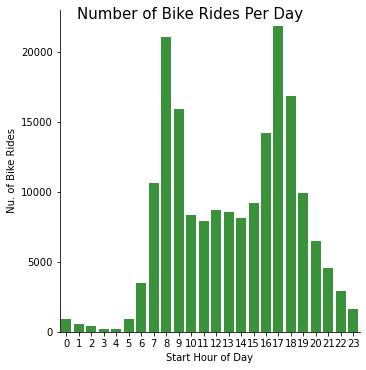

In [168]:
base_color = sb.color_palette()[2]
lm=sns.catplot(data=df, x='start_time_hour', kind='count', color = base_color, height = 5)
lm.set_axis_labels("Start Hour of Day", " Nu. of Bike Rides")
lm.fig.suptitle('Number of Bike Rides Per Day', fontsize=15);

Trip distribution over day hours.
Note: 0 means 12 AM, 23 means 11 PM 

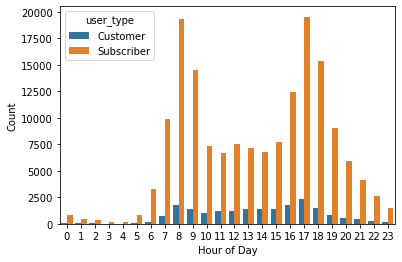

In [169]:
sb.countplot(data=df, x='start_time_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

When people go to work in the morning and get out of work in the afternoon, subscriber use obviously increases in the usual rush hours, their purposed use and target for riding is double verified. There was no common trend among customers who appear to ride the most for a reason separate from the subscriber drivers in the afternoons or early evenings.

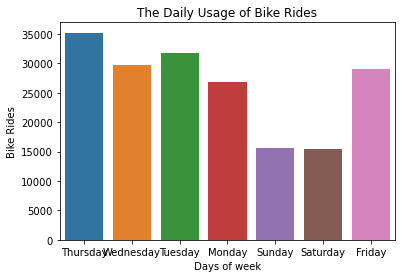

In [170]:
sb.countplot(data = df, x = 'start_time_day')
plt.xlabel(" Days of week ")
plt.ylabel("Bike Rides")
plt.title('The Daily Usage of Bike Rides');

# Daily customer-subscriber use

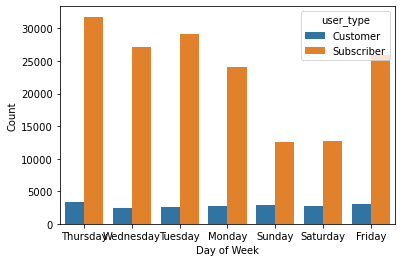

In [171]:
sb.countplot(data=df, x='start_time_day', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

The use of the subscriber was considerably higher than the normal consumers. A decrease in weekend volumes for subscribers suggests that they ride mostly bicycles to work days, whilst the almost opposite trend of a small rise in consumers' use on weekends reveals that it was more ideal for recreation / touring and relaxation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were more trips on working days (Friday) compared with weekends, between 8-9am and 17-18pm during the day, more male passengers than female riders were involved, and more participants compared to casual drivers were subscribers. On most of their journeys, the Participants did not use bike sharing, and most were between 25 and 40 years old. Most riding was quick and easy, and lasted between 5 and 10 minutes but very long outliers such as 24 hours were present.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration was a little surprising at first plotting out the original data. Used .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query().

## Bivariate Exploration

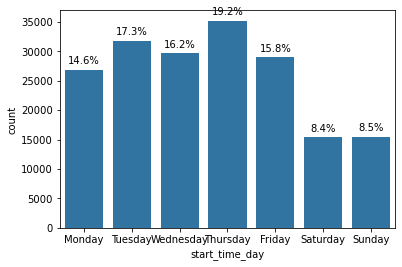

In [172]:
n_points = df.shape[0]
max_count = df['start_time_day'].value_counts().max()
max_prop = max_count / n_points
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_time_day', color = base_color, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday' ,'Friday', 'Saturday', 'Sunday'])
var_counts = df['start_time_day'].value_counts()
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):
    count = var_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_points)

    plt.text(loc, count + 1000, pct_string, ha = 'center', color = 'black')

Many rentals take place on working days with a handful of mid-week rentals (Tuesday, Wednesday, Thursday).
On weekends, the rent frequency drops by around 50 percent. 

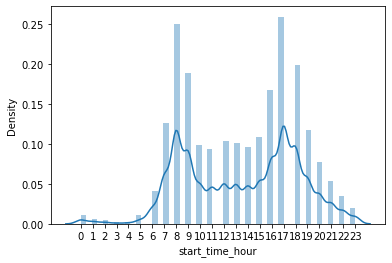

In [174]:
sb.distplot(df['start_time_hour']);
plt.xticks(np.arange(0,24,1),np.arange(0,24,1));

Many rentals commence at 8:00 a.m. (start of work) and 5:00 p.m. (end of work). It would be useful to further track the hour of the bike's return and to correlate the rental period in this matter.

In [175]:
df['member_age'] = 2019 - df['member_birth_year']
df.describe()
df = df.query('member_age <= 70')
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_age'] = df['member_age'].astype('int')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   duration_sec                   174572 non-null  int64         
 1   start_time                     174572 non-null  datetime64[ns]
 2   end_time                       174572 non-null  datetime64[ns]
 3   start_station_id               174377 non-null  float64       
 4   start_station_name             174377 non-null  object        
 5   start_station_latitude         174572 non-null  float64       
 6   start_station_longitude        174572 non-null  float64       
 7   end_station_id                 174377 non-null  float64       
 8   end_station_name               174377 non-null  object        
 9   end_station_latitude           174572 non-null  float64       
 10  end_station_longitude          174572 non-null  float64       
 11  

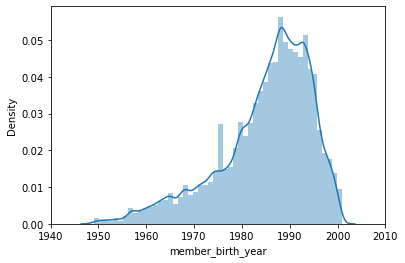

In [176]:
sb.distplot(df['member_birth_year']);
plt.xlim([1940, 2010]);

The approximate age of the consumers is 1983. The distribution of age is left distorted.

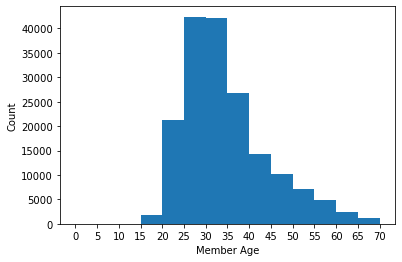

In [177]:
bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

visually examine for some outliers over 100 yrs old

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Many rentals take place on working days with a handful of mid-week rentals (Tuesday, Wednesday, Thursday). On weekends, the rent frequency drops by around 50 percent.
> - Many rentals commence at 8:00 a.m. (start of work) and 5:00 p.m. (end of work)

It will be helpful to keep track of the hour of the return of the bike and to correlate the rental time in this matter.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Many of the passengers were male subscribers who did not use the bike share on all the rides. Much of the participants were between 25 and 40 years old, leading to the trip allocation plots that most of the trips were on Mon-Fri and maxed during the rush hour of the day. As the age becomes older, the popularity of motorcycles has fallen dramatically.

## Multivariate Exploration

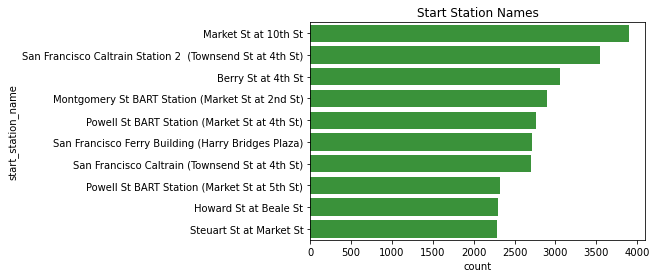

In [201]:
base_color = sb.color_palette()[2]
start_station_name = df['start_station_name'].value_counts().head(10).index
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = start_station_name)
plt.title('Start Station Names');

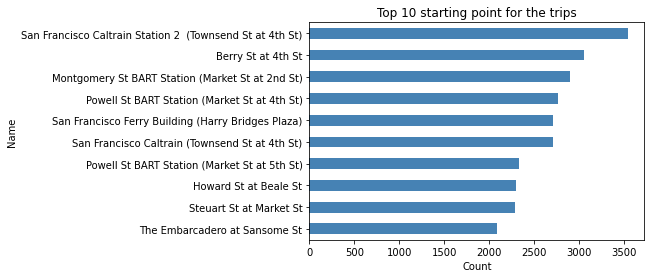

In [70]:
df = df.start_station_name.value_counts()[1:11].sort_values()
df.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 starting stations for the trips')
plt.xlabel('Count')
plt.ylabel('Name');



    Most of the people start trips from San Francisco.



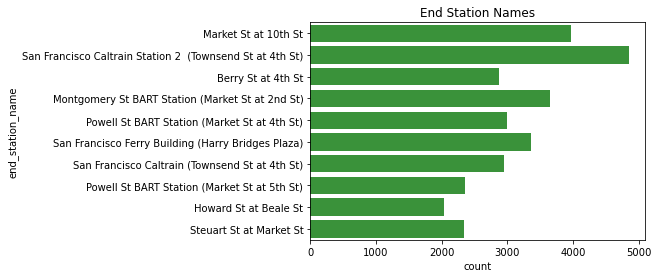

In [203]:
base_color = sb.color_palette()[2]
end_station_name = df['end_station_name'].value_counts().head(10).index
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = start_station_name)
plt.title('End Station Names');

Text(0.5, 1.0, 'End stations Location')

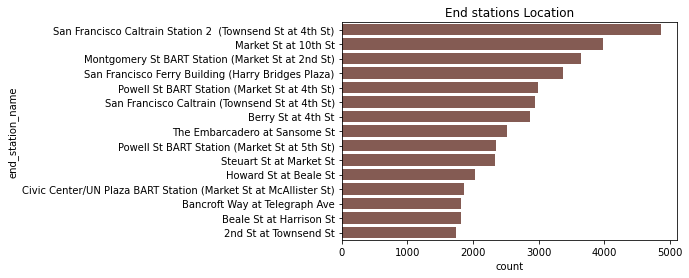

In [220]:
base_color = sb.color_palette()[5]
end_station_latitude = df['end_station_name'].value_counts().head(15).index
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = end_station_latitude)
plt.title('End stations Location')

                  Almost all terminals are located at a latitude of around 37 degrees.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  - Most people launch trips from San Francisco, and people finish their trips to San Francisco.
   - About every terminal is around 37 degrees latitude.

### Were there any interesting or surprising interactions between features?

> When we look at them together, there is nothing big surprise. The relationships between characteristics are both complimentary and very sensible. There is not too much or obvious disparity in consumption habit between men and women during the exploration, which may be correlated in contrast to men in the imbalanced number of female passengers. If there are more female data, it is fascinating to see how men and women use the system differently.

# Feedback


The multivariate exploration enhance some of the trends discovered in the past bivariate as well as univariate exploration, viewing the relationship between the multiple variables in the plot and combining details. The effective / short duration of usage for subscribers reflects their high concentration at rush periods between Monday and Friday, which means that the use is mostly for work transport. The more calming and versatile user use trend indicates that they use the bike sharing scheme very differently from the customers on weekends and afternoons, probably for urban or recreational purposes.